In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sells_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv'
buys_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv'
stocks_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv'
dividends_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv'

sells = pd.read_csv(sells_url)
buys = pd.read_csv(buys_url)
stocks = pd.read_csv(stocks_url)
dividends = pd.read_csv(dividends_url)

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
# Merge the dataframes
sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
sales = sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sell', '_stock'))

# Display the merged dataframe
sales.head()

,buy_id,date_sell,year_sell,month_sell,price_sell,qty_sell,amt_sell,net_sell,profit,days,...,price_buy,qty_buy,amt_buy,net_buy,status,kind,id_stock,name,market,website
0,1266,2023-06-23,2023,6,10.70,3000,"32,100.00","32,028.90","1,361.13",3,...,10.20,3000,"30,600.00","30,667.77",Sold,HD,129,CPNREIT,SET999,NaN
1,631,2020-03-13,2020,3,27.75,20000,"555,000.00","553,770.73","194,977.80",2088,...,17.90,20000,"358,000.00","358,792.93",Sold,DIV,129,CPNREIT,SET999,NaN
2,654,2020-03-13,2020,3,27.75,4000,"111,000.00","110,754.15","-17,529.36",123,...,32.00,4000,"128,000.00","128,283.51",Sold,DIV,129,CPNREIT,SET999,NaN
3,662,2020-03-13,2020,3,27.75,3000,"83,250.00","83,065.61","-11,643.70",95,...,31.50,3000,"94,500.00","94,709.31",Sold,DIV,129,CPNREIT,SET999,NaN
4,664,2020-03-13,2020,3,27.75,3000,"83,250.00","83,065.61","-4,878.74",91,...,29.25,3000,"87,750.00","87,944.35",Sold,DIV,129,CPNREIT,SET999,NaN


In [3]:
sales.dtypes

buy_id           int64
date_sell       object
year_sell        int64
month_sell       int64
price_sell     float64
qty_sell         int64
amt_sell       float64
net_sell       float64
profit         float64
days             int64
percent        float64
yearly         float64
dividend_id      int64
id_sell          int64
stock_id         int64
date_buy        object
year_buy         int64
month_buy        int64
price_buy      float64
qty_buy          int64
amt_buy        float64
net_buy        float64
status          object
kind            object
id_stock         int64
name            object
market          object
website         object
dtype: object

### Sales Analysis

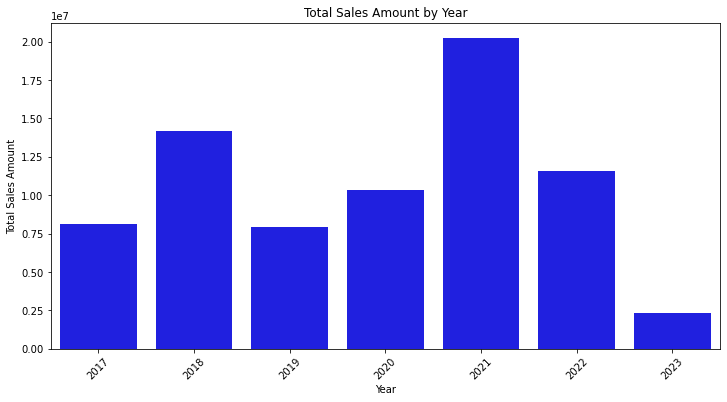

In [4]:
# Calculate the total sales amount by year
sales_amount_by_year = sales.groupby('year_sell')['amt_sell'].sum()

# Create a bar plot for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [5]:
sales_amount_by_year.to_frame()

,amt_sell
year_sell,
2017,"8,142,490.00"
2018,"14,167,950.00"
2019,"7,897,675.00"
2020,"10,321,820.00"
2021,"20,225,345.00"
2022,"11,600,885.00"
2023,"2,352,250.00"


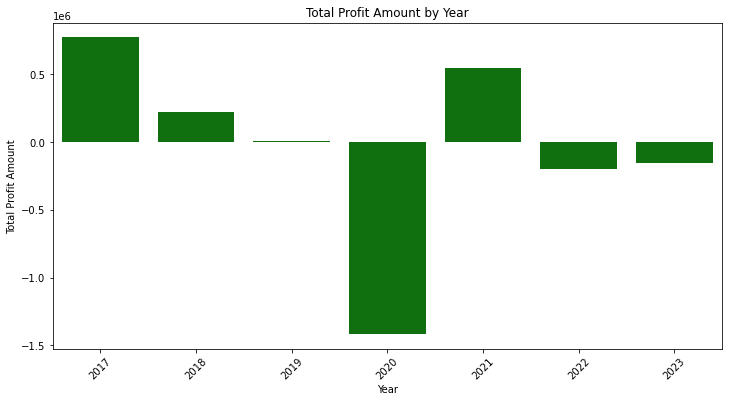

In [6]:
# Calculate the total sales amount by year
profit_amount_by_year = sales.groupby('year_sell')['profit'].sum()

# Create a bar plot for the total profit amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_amount_by_year.index, y=profit_amount_by_year.values, color='green')
plt.title('Total Profit Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit Amount')
plt.xticks(rotation=45)
plt.show()

In [7]:
profit_amount_by_year.to_frame()

,profit
year_sell,
2017,"772,818.01"
2018,"223,705.73"
2019,"11,250.02"
2020,"-1,415,394.27"
2021,"545,103.35"
2022,"-201,413.37"
2023,"-154,538.51"


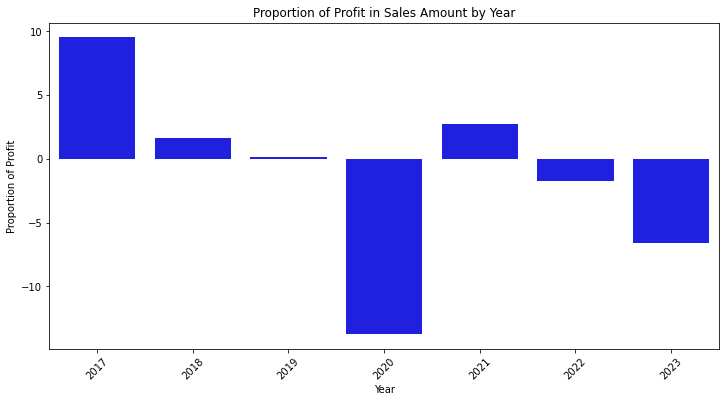

In [8]:
# Calculate the total profit by year
total_profit_by_year = sales.groupby('year_sell')['profit'].sum()

# Calculate the proportion of profit in sales amount by year
profit_proportion_by_year = (total_profit_by_year / sales_amount_by_year) * 100

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion_by_year.index, y=profit_proportion_by_year.values, color='blue')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

In [9]:
profit_proportion_by_year.to_frame().rename(columns={0: 'Profit Percent'})
#profit_percent_by_stock_2023_sorted.to_frame().reset_index().rename(columns={'name': 'Stock', 0: 'Profit Percent'})

,Profit Percent
year_sell,
2017,9.49
2018,1.58
2019,0.14
2020,-13.71
2021,2.70
2022,-1.74
2023,-6.57


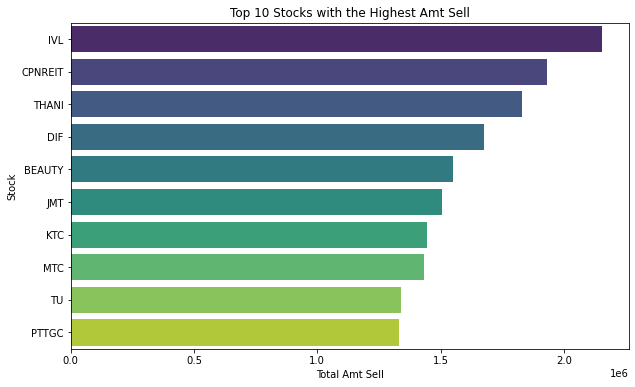

In [10]:
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest total amt sell
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Amt Sell')
plt.xlabel('Total Amt Sell')
plt.ylabel('Stock')
plt.show()

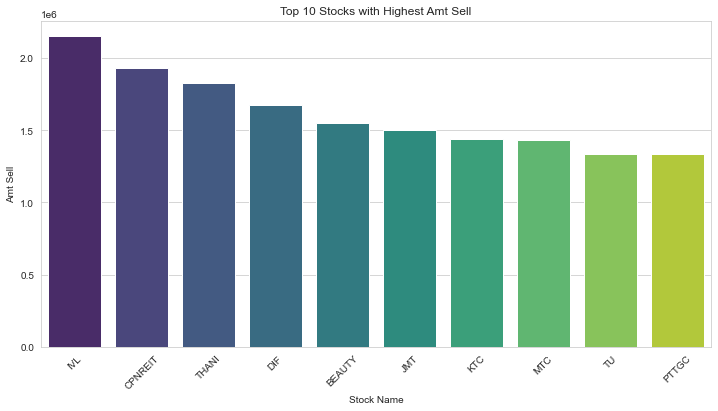

In [11]:
# Set the style of the visuals
sns.set_style('whitegrid')
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Amt Sell')
plt.xlabel('Stock Name')
plt.ylabel('Amt Sell')
plt.xticks(rotation=45)
plt.show()

In [12]:
top_10_stocks.to_frame()

,amt_sell
name,
IVL,"2,153,600.00"
CPNREIT,"1,929,400.00"
THANI,"1,827,500.00"
DIF,"1,676,000.00"
BEAUTY,"1,550,300.00"
JMT,"1,503,775.00"
KTC,"1,443,000.00"
MTC,"1,430,425.00"
TU,"1,338,200.00"


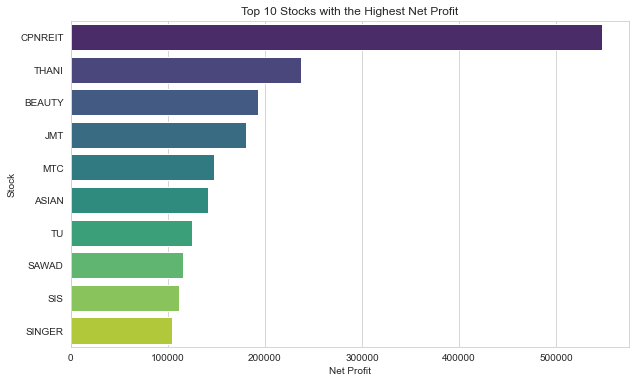

In [13]:
# Calculate the total net profit per stock
total_net_profit_per_stock = sales.groupby('name')['profit'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest net profit
top_10_stocks = total_net_profit_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Stock')
plt.show()

In [14]:
top_10_stocks.to_frame()

,profit
name,
CPNREIT,"547,131.19"
THANI,"237,046.32"
BEAUTY,"192,974.08"
JMT,"180,878.07"
MTC,"147,177.71"
ASIAN,"141,685.61"
TU,"125,061.53"
SAWAD,"115,506.59"
SIS,"110,986.74"


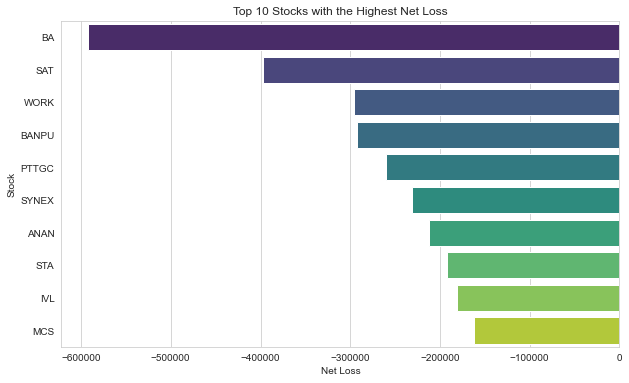

In [15]:
# Calculate the total net loss per stock
total_net_loss_per_stock = sales[sales['profit'] < 0].groupby('name')['profit'].sum().sort_values()

# Get the top 10 stocks with the highest net loss
top_10_stocks_with_highest_net_loss = total_net_loss_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net loss
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks_with_highest_net_loss.values, y=top_10_stocks_with_highest_net_loss.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Loss')
plt.xlabel('Net Loss')
plt.ylabel('Stock')
plt.show()

In [16]:
top_10_stocks_with_highest_net_loss.to_frame()

,profit
name,
BA,"-592,225.03"
SAT,"-397,317.50"
WORK,"-295,292.41"
BANPU,"-292,448.55"
PTTGC,"-260,539.98"
SYNEX,"-231,329.18"
ANAN,"-212,334.18"
STA,"-191,932.38"
IVL,"-181,457.70"


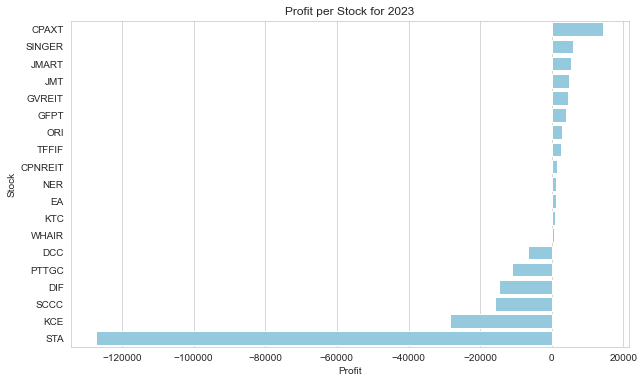

In [17]:
# Filter the sales for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]

# Calculate the average profit per stock for the year 2023
profit_per_stock_2023 = sales_2023.groupby('name')['profit'].sum().sort_values(ascending=False)

# Create a bar chart for the average profit per stock for the year 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_stock_2023.values, y=profit_per_stock_2023.index, color='skyblue')
plt.title('Profit per Stock for 2023')
plt.xlabel('Profit')
plt.ylabel('Stock')
plt.show()

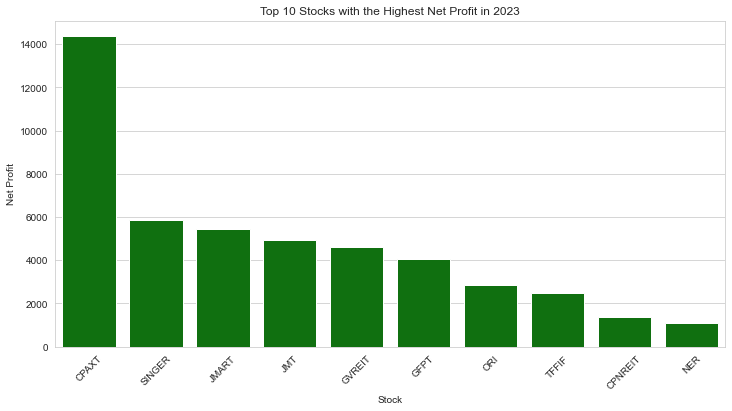

In [18]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the net profit for each stock in 2023
net_profit_by_stock_2023 = sales_2023.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit in 2023
top_10_stocks_2023 = net_profit_by_stock_2023.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_2023.index, y=top_10_stocks_2023.values, color='green')
plt.title('Top 10 Stocks with the Highest Net Profit in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

In [19]:
top_10_stocks_2023.to_frame()

,profit
name,
CPAXT,"14,372.89"
SINGER,"5,847.49"
JMART,"5,455.13"
JMT,"4,922.09"
GVREIT,"4,594.67"
GFPT,"4,074.74"
ORI,"2,857.81"
TFFIF,"2,482.22"
CPNREIT,"1,361.13"


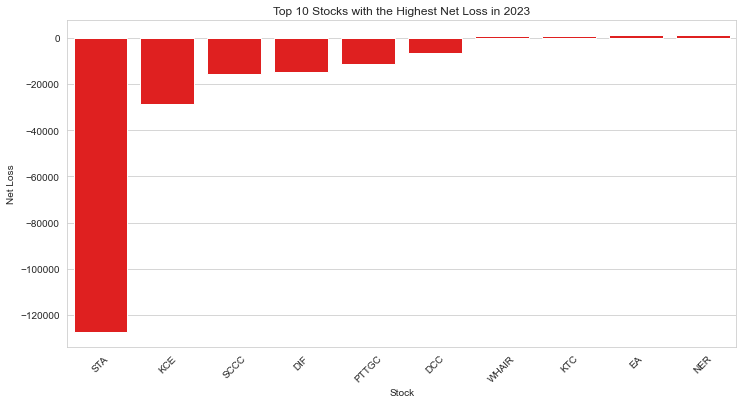

In [20]:
# Get the top 10 stocks with the highest net loss in 2023
top_10_stocks_loss_2023 = net_profit_by_stock_2023.nsmallest(10)

# Create a bar plot for the top 10 stocks with the highest net loss in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss_2023.index, y=top_10_stocks_loss_2023.values, color='red')
plt.title('Top 10 Stocks with the Highest Net Loss in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

In [21]:
top_10_stocks_loss_2023.to_frame()

,profit
name,
STA,"-127,260.28"
KCE,"-28,529.94"
SCCC,"-15,875.76"
DIF,"-14,620.17"
PTTGC,"-11,197.69"
DCC,"-6,773.43"
WHAIR,656.69
KTC,909.19
EA,"1,089.25"


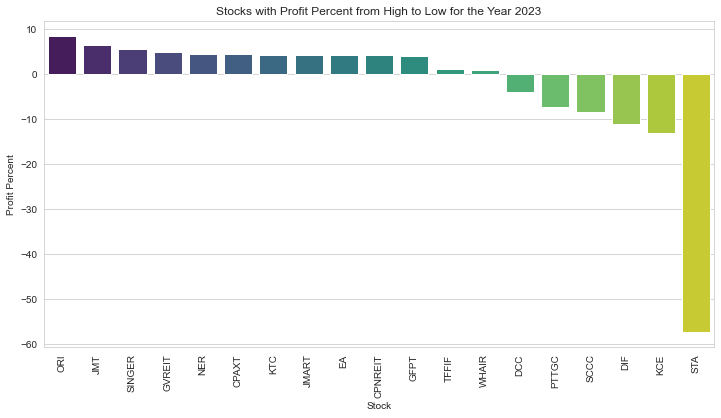

In [22]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the profit percent for each stock in 2023
profit_percent_by_stock_2023 = (sales_2023.groupby('name')['profit'].sum() / sales_2023.groupby('name')['amt_sell'].sum()) * 100

# Sort the stocks by profit percent from high to low
profit_percent_by_stock_2023_sorted = profit_percent_by_stock_2023.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low for the year 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock_2023_sorted.index, y=profit_percent_by_stock_2023_sorted.values, palette='viridis')
plt.title('Stocks with Profit Percent from High to Low for the Year 2023')
plt.xlabel('Stock')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Display the profit percent by stock in 2023 in a table format
profit_percent_by_stock_2023_sorted.to_frame().rename(columns={0: 'Profit Percent'})

,Profit Percent
name,
ORI,8.51
JMT,6.42
SINGER,5.55
GVREIT,4.89
NER,4.53
CPAXT,4.51
KTC,4.33
JMART,4.33
EA,4.25


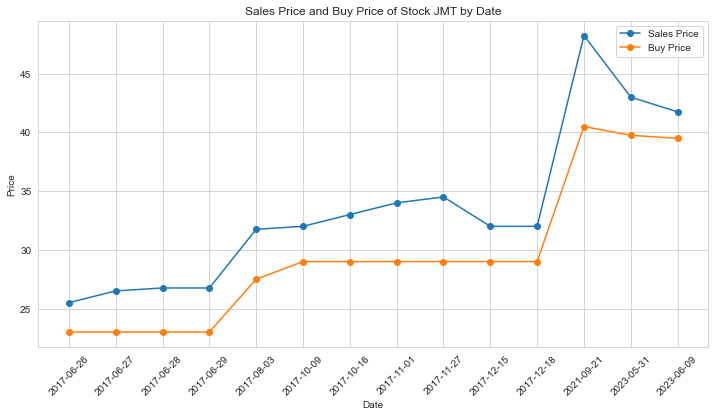

In [25]:
sales_JMT = sales[sales['name'] == 'JMT']
# Calculate the sales amount by date_sell
sales_price_by_date = sales_JMT.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_JMT.groupby('date_sell')['price_buy'].mean()

# Create a line chart of sales amount and buy price by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sales Price')
plt.plot(buy_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales Price and Buy Price of Stock JMT by Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

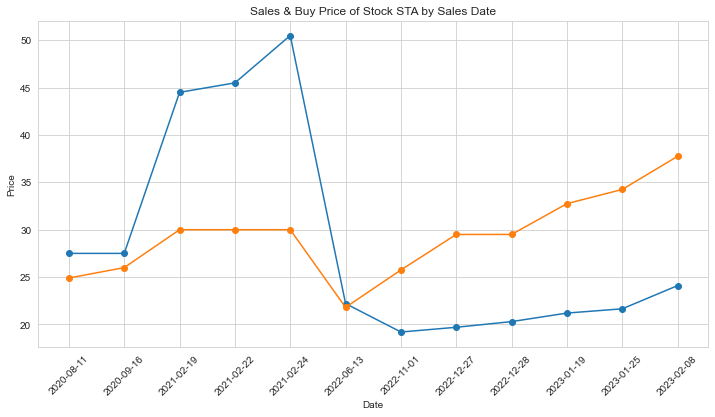

In [26]:
# Filter the sales data for the stock 'STA'
sales_STA = sales[sales['name'] == 'STA']

# Calculate the sales amount by date_sell
sales_price_by_date = sales_STA.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_STA.groupby('date_sell')['price_buy'].mean()
# Create a line chart of sales amount by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sell Price')
plt.plot(sales_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales & Buy Price of Stock STA by Sales Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

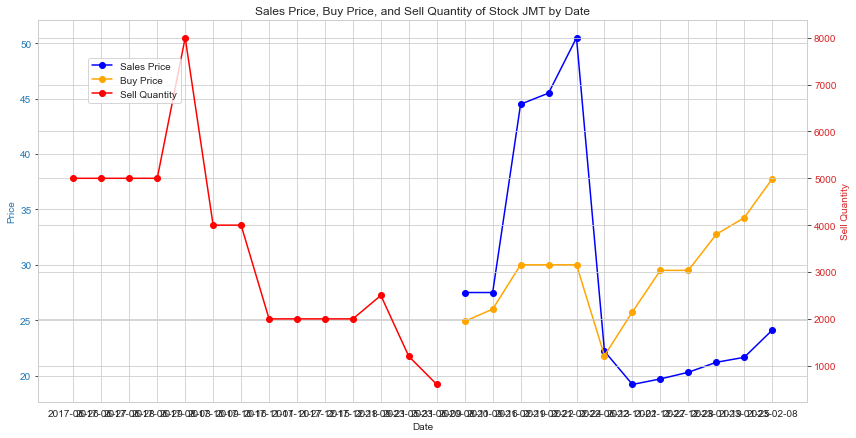

In [27]:
# Calculate the sell quantity by date_sell
sell_qty_by_date = sales_JMT.groupby('date_sell')['qty_sell'].sum()

# Create a line chart of sales amount, buy price, and sell quantity by date_sell
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(sales_price_by_date.index, sales_price_by_date.values, color='blue', marker='o', label='Sales Price')
ax1.plot(buy_price_by_date.index, buy_price_by_date.values, color='orange', marker='o', label='Buy Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'  # we already handled the x-label with ax1
ax2.set_ylabel('Sell Quantity', color=color)  # we already handled the x-label with ax1
ax2.plot(sell_qty_by_date.index, sell_qty_by_date.values, color='red', marker='o', label='Sell Quantity')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Sales Price, Buy Price, and Sell Quantity of Stock JMT by Date')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

### Dividend Analysis

In [ ]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dividends_by_year.to_frame()

In [ ]:
# Filter the dividends data for the year 2023
dividends_of_q2 = dividends[dividends['quarter'] == 2]
# Calculate the total dividends by year
dividends_by_qtr = dividends_of_q2.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by qtr
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_qtr.index, y=dividends_by_qtr.values, color='purple')
plt.title('Total Dividends of Q2')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dividends_by_qtr.to_frame()

In [ ]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [ ]:
type(top_10_dividend_stocks)

In [ ]:
top_10_dividend_stocks.to_frame()

In [ ]:
# Calculate the total profit
total_profit = sales['profit'].sum()
formatted_amt = '{:,.2f}'.format(total_profit)
print(formatted_amt)

In [ ]:
# Calculate the total dividends
total_dividends = dividends['amt'].sum()
formatted_amt = '{:,.2f}'.format(total_dividends)
print(formatted_amt)

### By market

In [ ]:
# Calculate the total sales amount by market
sales_amount_by_market = sales.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market, labels=sales_amount_by_market.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market')
plt.show()

In [ ]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]
# Calculate the total sales amount by market
sales_amount_by_market_2023 = sales_2023.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market_2023, labels=sales_amount_by_market_2023.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market 2023')
plt.show()

In [ ]:
df = pd.concat([dividends_by_year, total_profit_by_year],axis=1,keys=['dividend','profit'])
df           